# 1. 패키지 불러오기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ecosloader
from ecosloader.ecos_api import api_client

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# ecosloader version 확인
print(ecosloader.__version__)

0.0.7


# 2. 데이터 불러오기

In [3]:
# API key 확인
api_key = 'HLOXWJTZRBR3KCAG5JU3'
client = api_client(api_key)
client.check_api_key()

Valid API key: HLOXWJTZRBR3KCAG5JU3


In [4]:
# stat code 불러오기
client.stats_codes.load_stats_code(path='https://github.com/jmlee8939/macrowave_investing/raw/refs/heads/main/data/stats_df.csv')

In [5]:
# 주요 stat idx
indexes = [1378, 1381, 1425, 3839, 1347, 355, 2784, 3637, 399, 253, 299, 5310, 1327]
# 광공업생산지수_M : 1378
# 서비스업생산지수_M : 1381 
# 상품판매액지수_M : 1425
# 설비투자지수_M : 3839
# 건설기성액_M : 1347
# 수출액_M : 355
# 수입액_M : 2784
# 취업자수_Q : 3637
# 기업경기실사지수_M : 399
# 소비자기대지수_M : 253
# 부동산_M : 299
# 주식_D : 5310
# M2통화량 : 1327

In [6]:
client.stats_codes.stats_codes_info.loc[indexes]

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
1378,901Y033,8.1.4. 전산업생산지수(농림어업제외),Group1,계정항목,AB00,광공업,A00,전산업생산지수(농림어업 제외),M,200001,202411,598,2020=100,NaN
1381,901Y033,8.1.4. 전산업생산지수(농림어업제외),Group1,계정항목,AC00,서비스업,A00,전산업생산지수(농림어업 제외),M,200001,202411,598,2020=100,NaN
1425,901Y100,8.5.2. 재별 및 상품군별 판매액지수,Group1,계정항목,G0,총지수,NaN,NaN,M,199501,202411,1077,NaN,NaN
3839,901Y066,8.1.3. 설비투자지수,Group1,계정항목,I15B,계절조정지수,NaN,NaN,M,199502,202411,358,2020=100,NaN
1347,901Y104,8.4.2. 건설기성액,Group1,계정항목,I48A,총기성액,NaN,NaN,M,199707,202411,1540,백만원,NaN
355,901Y011,3.2.1.1. 국가별 수출,Group1,계정항목,FIEE,국별수출(관세청),NaN,NaN,M,196601,202411,707,천달러,NaN
2784,901Y012,3.2.1.2. 국가별 수입,Group1,계정항목,FIEF,국별수입(관세청),NaN,NaN,M,196601,202411,707,천달러,NaN
3637,902Y022,9.1.5.3. 국제 주요국 취업자수(계절변동조정),Group1,계정항목,KOR,한국,NaN,NaN,Q,1983Q1,2024Q3,167,천명,NaN
399,512Y013,6.1.1.1. 기업경기조사(실적),Group1,업종코드,99988,전 산 업,NaN,NaN,M,200301,202412,1584,NaN,NaN
253,511Y002,"6.2.1. 소비자동향조사(전국, 월, 2008.9~)",Group1,CSI코드,FMBB,향후경기전망CSI,FMB,경제전망조사,M,200807,202412,4356,NaN,NaN


In [7]:
# index 로 데이터 불러오기
df = client.stat_search_indexes(indexes)
df.dropna(inplace=True)
df.head(3)

,전산업생산지수(농림어업제외) 광공업 2020=100 M,전산업생산지수(농림어업제외) 서비스업 2020=100 M,재별 및 상품군별 판매액지수 총지수 nan M,설비투자지수 계절조정지수 2020=100 M,건설기성액 총기성액 백만원 M,국가별 수출 국별수출(관세청) 천달러 M,국가별 수입 국별수입(관세청) 천달러 M,국제 주요국 취업자수(계절변동조정) 한국 천명 Q,기업경기조사(실적) 전 산 업 nan M,9~) 향후경기전망CSI nan M,주택매매가격지수(KB) 총지수 2022.01=100 M,주식시장(일) KOSPI지수 1980.01.04=100 D,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M"
TIME,,,,,,,,,,,,,
2008-07-01,77.1,79.6,63.1,72.8,7499154.0,40961223.0,42952491.0,23766.3,75.0,49.0,64.314,1666.46,1375993.6
2008-07-02,77.1,79.6,63.1,72.8,7499154.0,40961223.0,42952491.0,23766.3,75.0,49.0,64.314,1623.60,1375993.6
2008-07-03,77.1,79.6,63.1,72.8,7499154.0,40961223.0,42952491.0,23766.3,75.0,49.0,64.314,1606.54,1375993.6


# 3. 데이터 전처리

In [8]:
# 분기 별 평균 데이터 전처리
df_quarter = df.resample('QE').mean().dropna()
df_quarter.head(3)

,전산업생산지수(농림어업제외) 광공업 2020=100 M,전산업생산지수(농림어업제외) 서비스업 2020=100 M,재별 및 상품군별 판매액지수 총지수 nan M,설비투자지수 계절조정지수 2020=100 M,건설기성액 총기성액 백만원 M,국가별 수출 국별수출(관세청) 천달러 M,국가별 수입 국별수입(관세청) 천달러 M,국제 주요국 취업자수(계절변동조정) 한국 천명 Q,기업경기조사(실적) 전 산 업 nan M,9~) 향후경기전망CSI nan M,주택매매가격지수(KB) 총지수 2022.01=100 M,주식시장(일) KOSPI지수 1980.01.04=100 D,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M"
TIME,,,,,,,,,,,,,
2008-09-30,74.670652,79.364130,64.940217,71.531522,8.056886e+06,3.834321e+07,4.098264e+07,23766.300000,82.805435,69.847826,64.447457,1519.422500,1.387432e+06
2008-12-31,70.180435,80.623913,66.805435,63.773913,8.134214e+06,3.104727e+07,3.052733e+07,23766.300000,69.455435,57.347826,64.228261,1133.213043,1.421654e+06
2009-03-31,63.795556,76.850000,60.172222,55.820000,7.293360e+06,2.478746e+07,2.384610e+07,23669.268889,59.977778,65.722222,63.336533,1142.975667,1.460742e+06


In [9]:
# 직전 분기 대비 증가량
df_diff = df_quarter - df_quarter.shift(1)
df_diff.head(3)

,전산업생산지수(농림어업제외) 광공업 2020=100 M,전산업생산지수(농림어업제외) 서비스업 2020=100 M,재별 및 상품군별 판매액지수 총지수 nan M,설비투자지수 계절조정지수 2020=100 M,건설기성액 총기성액 백만원 M,국가별 수출 국별수출(관세청) 천달러 M,국가별 수입 국별수입(관세청) 천달러 M,국제 주요국 취업자수(계절변동조정) 한국 천명 Q,기업경기조사(실적) 전 산 업 nan M,9~) 향후경기전망CSI nan M,주택매매가격지수(KB) 총지수 2022.01=100 M,주식시장(일) KOSPI지수 1980.01.04=100 D,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M"
TIME,,,,,,,,,,,,,
2008-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,-4.490217,1.259783,1.865217,-7.757609,77327.380435,-7.295949e+06,-1.045531e+07,0.000000,-13.350000,-12.500000,-0.219196,-386.209457,34222.314130
2009-03-31,-6.384879,-3.773913,-6.633213,-7.953913,-840853.443961,-6.259804e+06,-6.681226e+06,-97.031111,-9.477657,8.374396,-0.891728,9.762623,39087.846594


In [10]:
# 1년간의 평균 거동 (추세선)
df_ma = df_quarter.rolling(window=4).mean()
# 1년간의 추세 대비 증감
df_ma_diff = df_quarter - df_ma

In [11]:
# 전기대비 증감 및 추세(1년)대비 위치
df_diff.columns = [i + '전기대비 증감' for i in df_diff.columns]
df_ma_diff.columns = [i + '추세(1년)대비 위치' for i in df_ma.columns]
df_cycle = pd.concat([df_diff, df_ma_diff], axis=1)
df_cycle = df_cycle.dropna()
df_cycle.head(3)

,전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감,전산업생산지수(농림어업제외) 서비스업 2020=100 M전기대비 증감,재별 및 상품군별 판매액지수 총지수 nan M전기대비 증감,설비투자지수 계절조정지수 2020=100 M전기대비 증감,건설기성액 총기성액 백만원 M전기대비 증감,국가별 수출 국별수출(관세청) 천달러 M전기대비 증감,국가별 수입 국별수입(관세청) 천달러 M전기대비 증감,국제 주요국 취업자수(계절변동조정) 한국 천명 Q전기대비 증감,기업경기조사(실적) 전 산 업 nan M전기대비 증감,9~) 향후경기전망CSI nan M전기대비 증감,...,설비투자지수 계절조정지수 2020=100 M추세(1년)대비 위치,건설기성액 총기성액 백만원 M추세(1년)대비 위치,국가별 수출 국별수출(관세청) 천달러 M추세(1년)대비 위치,국가별 수입 국별수입(관세청) 천달러 M추세(1년)대비 위치,국제 주요국 취업자수(계절변동조정) 한국 천명 Q추세(1년)대비 위치,기업경기조사(실적) 전 산 업 nan M추세(1년)대비 위치,9~) 향후경기전망CSI nan M추세(1년)대비 위치,주택매매가격지수(KB) 총지수 2022.01=100 M추세(1년)대비 위치,주식시장(일) KOSPI지수 1980.01.04=100 D추세(1년)대비 위치,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M추세(1년)대비 위치"
TIME,,,,,,,,,,,,,,,,,,,,,
2009-06-30,9.792357,3.979670,7.109096,5.112967,6.929281e+05,5.307437e+06,7.968867e+05,75.931111,24.868376,35.618437,...,-2.081633,118601.229630,-9.733117e+05,-5.356776e+06,8.432778,10.574954,27.776026,-0.503214,80.592445,55112.845291
2009-09-30,3.709914,0.125764,-0.700884,3.278989,-4.232938e+05,1.473294e+06,3.622670e+06,0.000000,4.039716,15.974558,...,3.027247,-181219.669498,2.193738e+06,1.445139e+06,13.707778,13.094561,31.883736,0.195244,261.196653,48748.304969
2009-12-31,4.671739,3.608696,9.686957,5.932609,1.343662e+06,3.096129e+06,2.700302e+06,0.000000,8.311957,-0.945652,...,7.367193,969331.941915,4.385603e+06,4.035783e+06,18.982778,14.470919,16.182649,0.848146,196.187713,50901.903067


# 4. 데이터 시각화

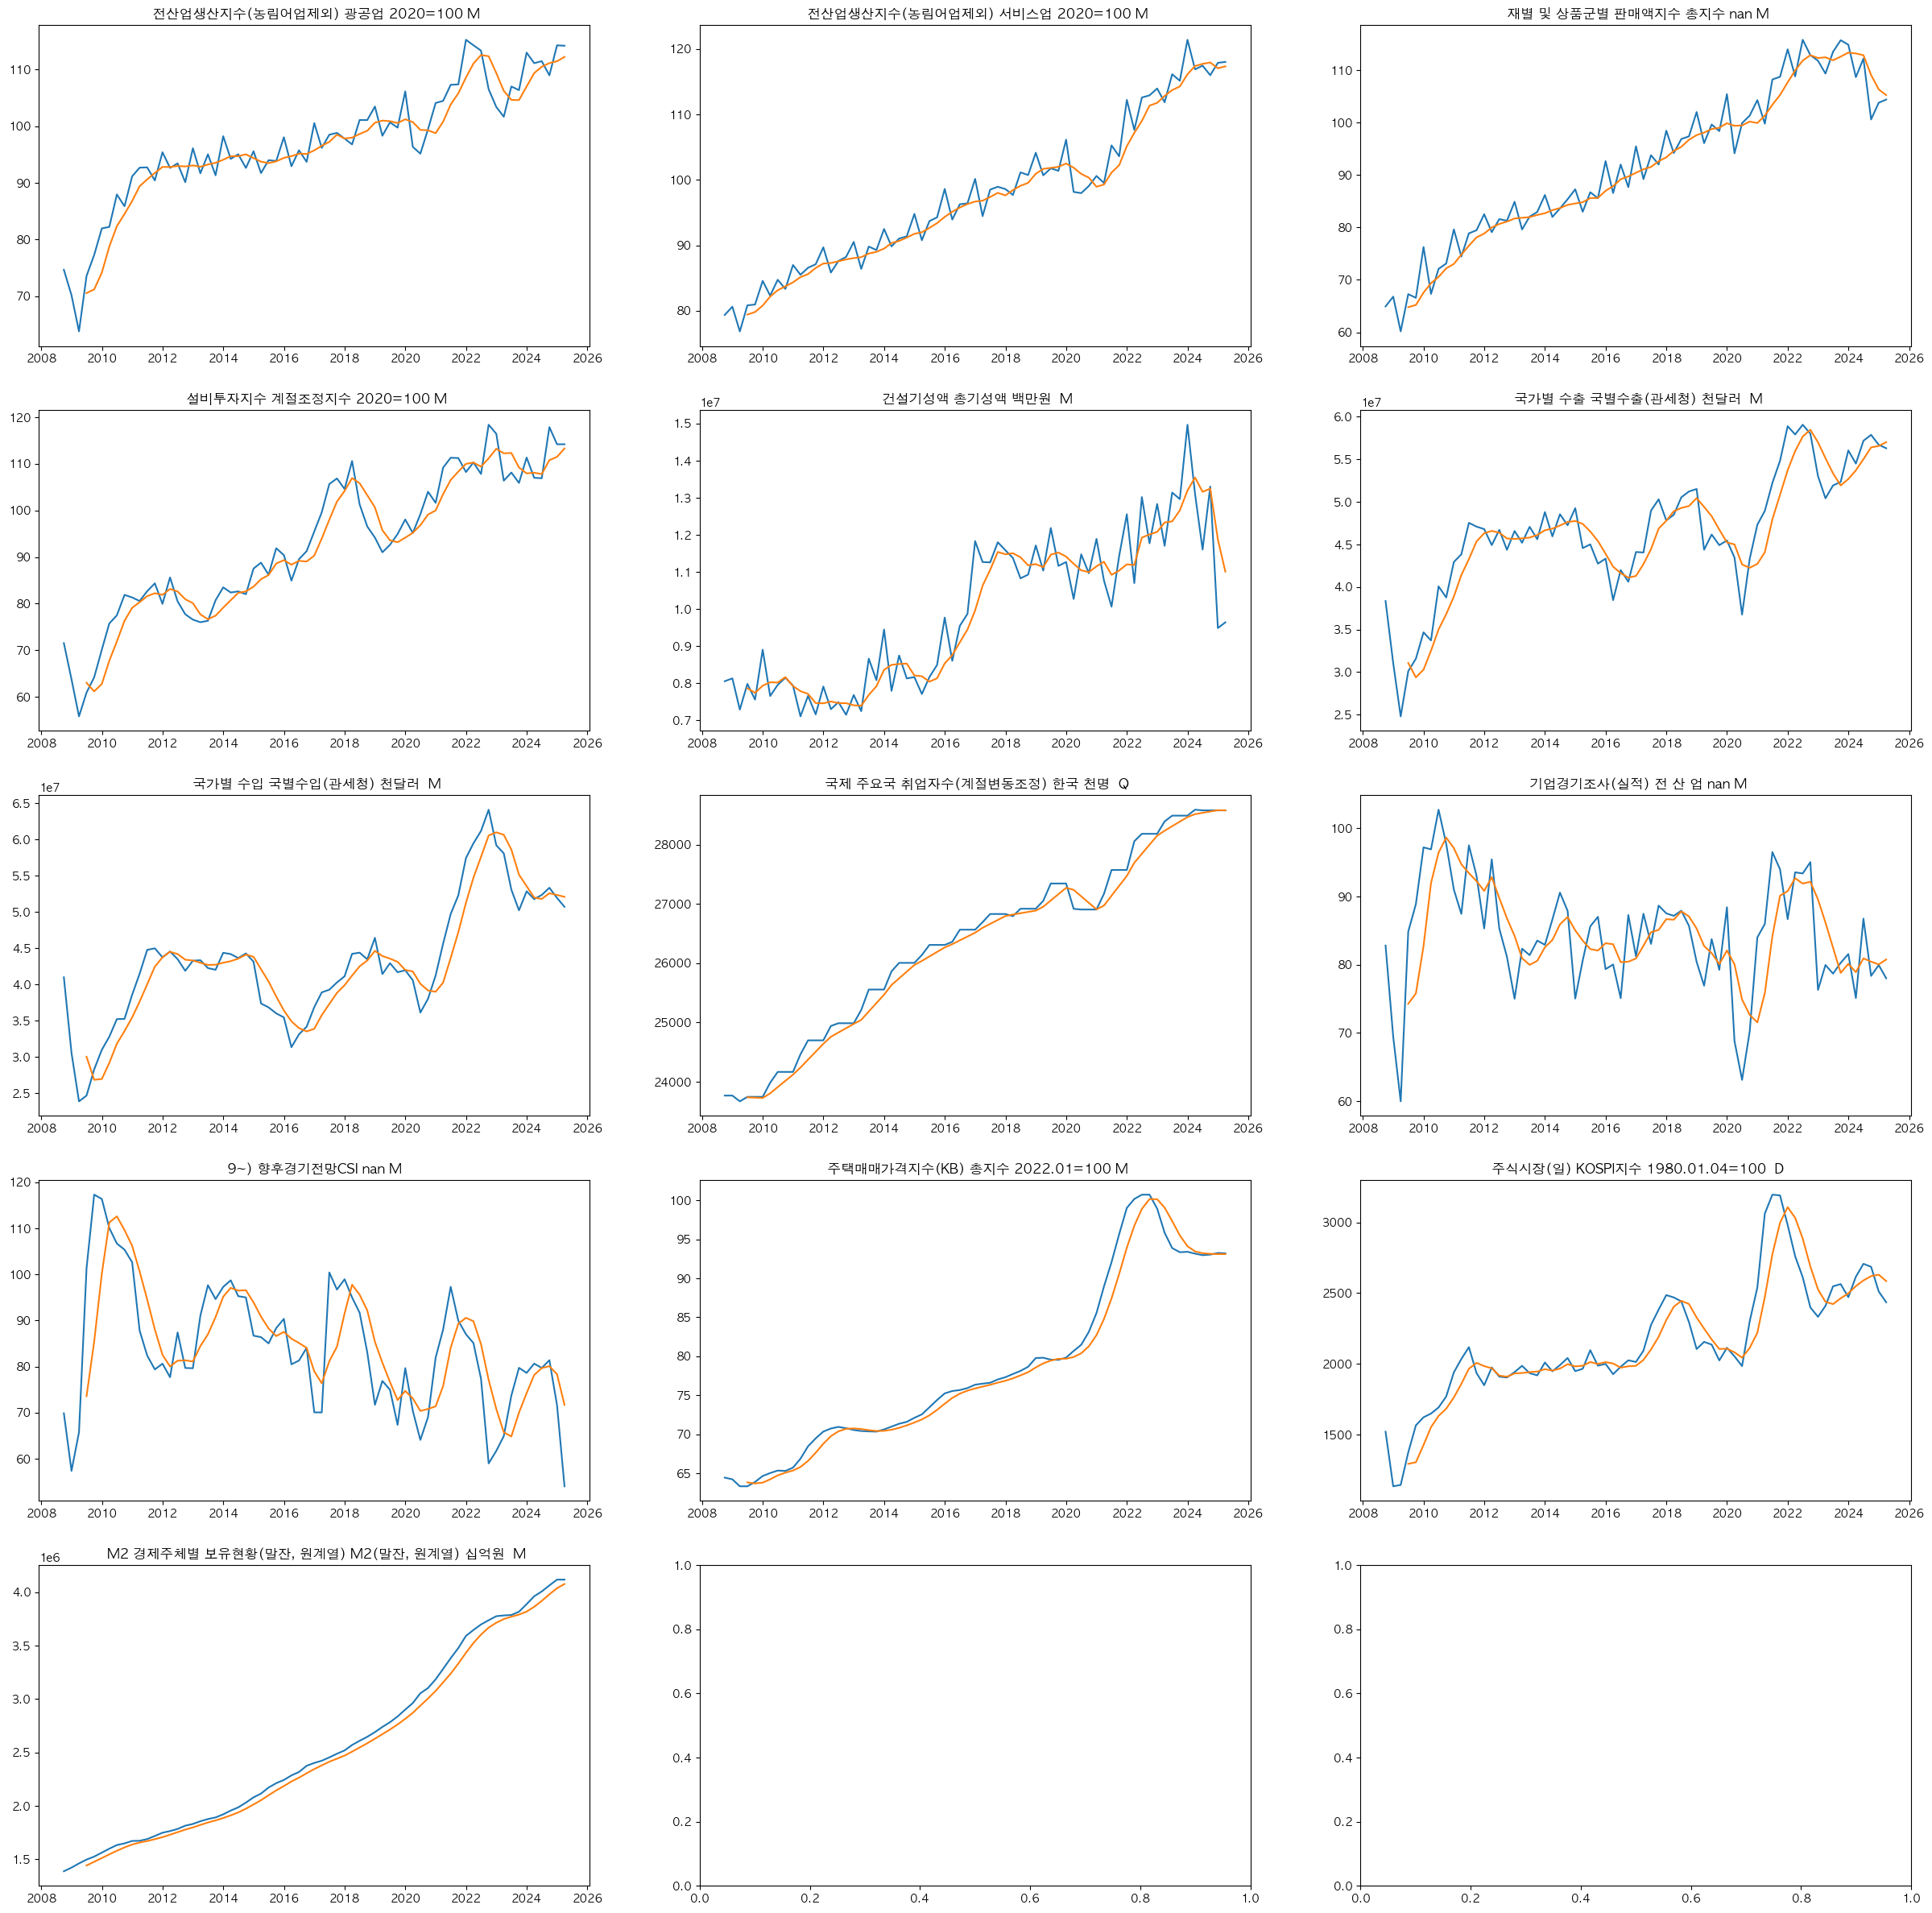

In [12]:
# 추세 및 분기별 데이터 시각화
fig, axes = plt.subplots(5, 3, figsize=(30, 30))
for i, col in enumerate(df_quarter.columns):
    axes[i//3, i%3].plot(df_quarter[col])
    axes[i//3, i%3].plot(df_ma[col])
    axes[i//3, i%3].set_title(col)

# 5. 경기 순환 시계 시각화

In [13]:
# 시간 변환 함수
def time_point_to_quarter(year, quarter):
    if quarter == 1:
        return str(year) + '-03-31'
    elif quarter == 2:
        return str(year) + '-06-30'
    elif quarter == 3:
        return str(year) + '-09-30'
    elif quarter == 4:
        return str(year) + '-12-31'
    return None

In [14]:
def check_words_in_string(s, word):
    words = word.split(' ')
    # 모든 단어가 문자열에 포함되었는지 확인
    return all(word in s for word in words)

In [15]:
def get_time_point(df, word, year, quarter):
    time = time_point_to_quarter(year, quarter)
    time = pd.to_datetime(time)
    cols = [i for i in df.columns if check_words_in_string(i, word)]
    return df[cols].loc[time]

In [16]:
# 스케일링 함수 정의
def scale_column(column):
    # 양수와 음수 마스크 생성
    pos_mask = column > 0
    neg_mask = column < 0
    
    scaled_col = column.copy()  # 원본 보존

    # 양수 스케일링
    if np.any(pos_mask):
        pos_max = np.max(column[pos_mask])
        scaled_col[pos_mask] = column[pos_mask] / pos_max
    
    # 음수 스케일링
    if np.any(neg_mask):
        neg_min = np.min(column[neg_mask])  # 절대값이 가장 큰 음수
        scaled_col[neg_mask] = column[neg_mask] / abs(neg_min)

    return scaled_col

# 각 컬럼에 대해 스케일링 적용
scaled_df_cycle = df_cycle.apply(scale_column)

In [17]:
output_df = get_time_point(scaled_df_cycle, '광공업 생산지수', 2023, 3)
output_df

전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감       -0.065906
전산업생산지수(농림어업제외) 광공업 2020=100 M추세(1년)대비 위치    0.224875
Name: 2023-09-30 00:00:00, dtype: float64

In [18]:
def plot_df(x, y, pre_x, pre_y, max_lim, name, fig=None, ax=None):
    if max_lim < max((abs(x), abs(y))):
        max_lim = max((abs(x), abs(y)))

    ax.scatter(x, y, label=name)
    ax.plot([pre_x, x], [pre_y, y], linestyle='--', alpha = 0.5)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('전기대비 증감')
    ax.set_ylabel('추세(1년)대비 위치')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.label_outer()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5)
    ax.text(1.2, 1.2, '상승')
    ax.text(1.2, -1.3, '회복')
    ax.text(-1.3, 1.2, '둔화')
    ax.text(-1.3, -1.3, '하강')
    ax.grid(True)
    return fig, ax, max_lim

In [19]:
legend_list = ['광공업 생산지수', '서비스업 생산지수', '상품 판매액지수', '설비투자지수', '건설기성액', '수출', '수입', '기업경기조사', 'M2 보유현황']

In [20]:
get_time_point(scaled_df_cycle, '취업자수', 2024, 4)

국제 주요국 취업자수(계절변동조정) 한국 천명  Q전기대비 증감        0.000000
국제 주요국 취업자수(계절변동조정) 한국 천명  Q추세(1년)대비 위치   -0.008726
Name: 2024-12-31 00:00:00, dtype: float64

In [21]:
df_quarter_selceted = df_quarter.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 12]]

In [22]:
df_quarter_selceted.columns

Index([' 전산업생산지수(농림어업제외) 광공업 2020=100 M', ' 전산업생산지수(농림어업제외) 서비스업 2020=100 M',
       ' 재별 및 상품군별 판매액지수 총지수 nan M', ' 설비투자지수 계절조정지수 2020=100 M',
       ' 건설기성액 총기성액 백만원  M', ' 국가별 수출 국별수출(관세청) 천달러  M',
       ' 국가별 수입 국별수입(관세청) 천달러  M', ' 국제 주요국 취업자수(계절변동조정) 한국 천명  Q',
       ' 기업경기조사(실적) 전 산 업 nan M',
       ' M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원  M'],
      dtype='object')

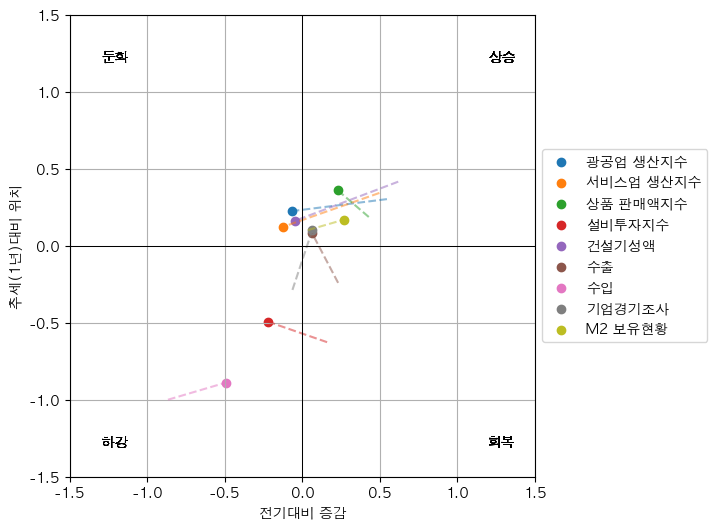

In [23]:
max_lim = 0
fig, ax = plt.subplots(figsize=(6, 6))
for i in legend_list:
    output_df = get_time_point(scaled_df_cycle, i, 2023, 3)
    pre_output_df = get_time_point(scaled_df_cycle, i, 2023, 2)
    fig, ax, max_lim = plot_df(output_df.iloc[0], output_df.iloc[1], pre_output_df.iloc[0], pre_output_df.iloc[1], max_lim, i, fig, ax)

# 6. 실제 데이터와 비교

In [24]:
df_all = pd.concat([df_quarter, df_cycle], axis=1)

In [25]:
t_df = df.loc[((pd.to_datetime(time_point_to_quarter(2023, 3)) - pd.DateOffset(months=6)) <= df.index) & (df.index <= pd.to_datetime(time_point_to_quarter(2023, 3)))]
t_df_quarter = df_quarter.loc[((pd.to_datetime(time_point_to_quarter(2023, 3)) - pd.DateOffset(months=6)) <= df_quarter.index) & (df_quarter.index <= pd.to_datetime(time_point_to_quarter(2023, 3)))]
t_df_ma = df_ma.loc[((pd.to_datetime(time_point_to_quarter(2023, 3)) - pd.DateOffset(months=6)) <= df_ma.index) & (df_ma.index <= pd.to_datetime(time_point_to_quarter(2023, 3)))]

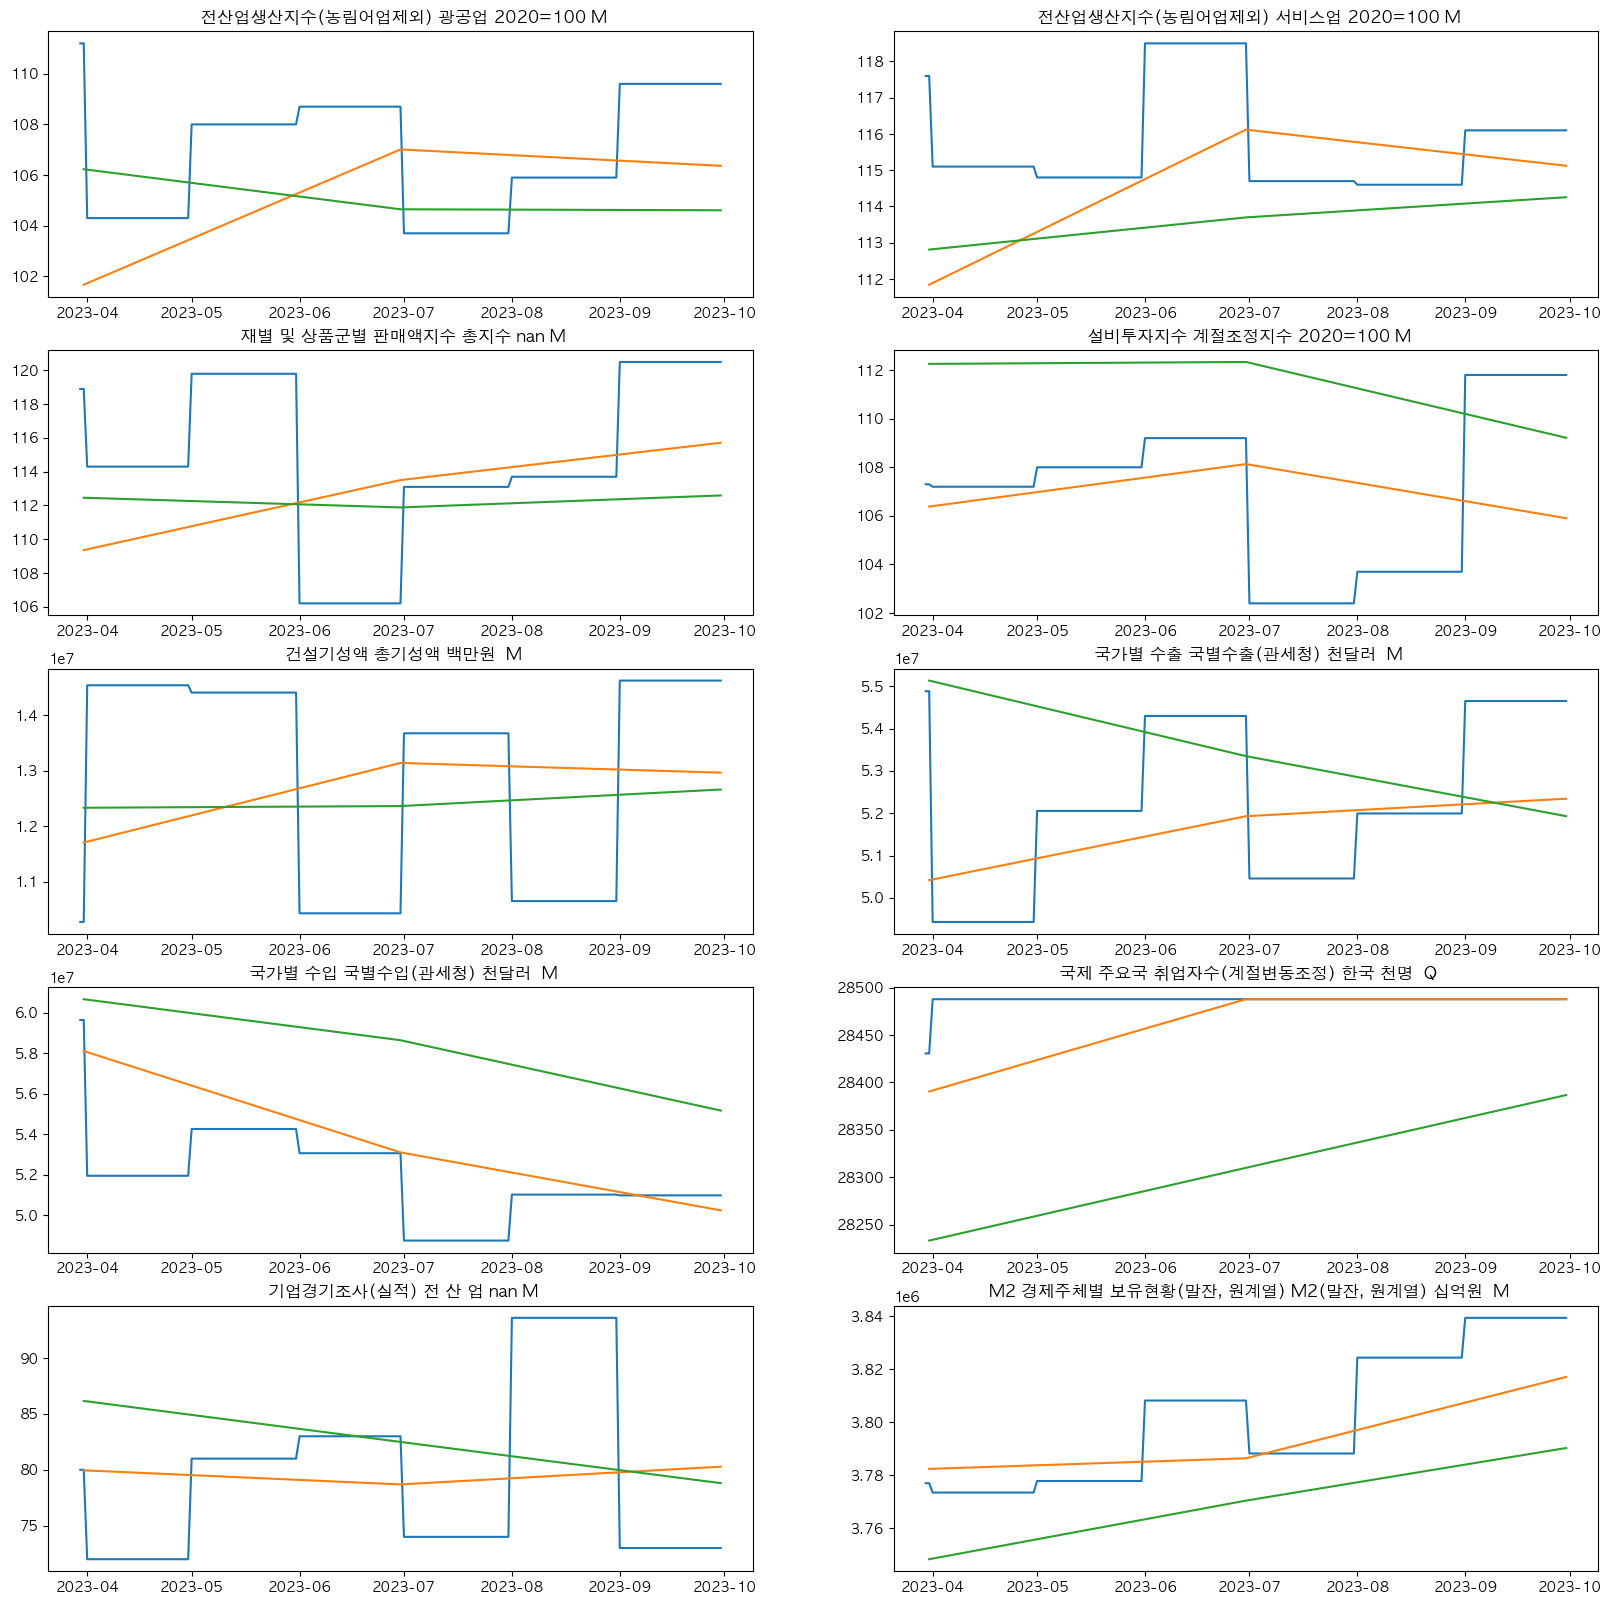

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
for i, col in enumerate(df_quarter_selceted.columns):
    axes[i//2, i%2].plot(t_df[col])
    axes[i//2, i%2].plot(t_df_quarter[col])
    axes[i//2, i%2].plot(t_df_ma[col])
    axes[i//2, i%2].set_title(col)

# 7. 비슷한 거동을 보이는 지표 찾기

In [27]:
scaled_df_cycle

,전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감,전산업생산지수(농림어업제외) 서비스업 2020=100 M전기대비 증감,재별 및 상품군별 판매액지수 총지수 nan M전기대비 증감,설비투자지수 계절조정지수 2020=100 M전기대비 증감,건설기성액 총기성액 백만원 M전기대비 증감,국가별 수출 국별수출(관세청) 천달러 M전기대비 증감,국가별 수입 국별수입(관세청) 천달러 M전기대비 증감,국제 주요국 취업자수(계절변동조정) 한국 천명 Q전기대비 증감,기업경기조사(실적) 전 산 업 nan M전기대비 증감,9~) 향후경기전망CSI nan M전기대비 증감,...,설비투자지수 계절조정지수 2020=100 M추세(1년)대비 위치,건설기성액 총기성액 백만원 M추세(1년)대비 위치,국가별 수출 국별수출(관세청) 천달러 M추세(1년)대비 위치,국가별 수입 국별수입(관세청) 천달러 M추세(1년)대비 위치,국제 주요국 취업자수(계절변동조정) 한국 천명 Q추세(1년)대비 위치,기업경기조사(실적) 전 산 업 nan M추세(1년)대비 위치,9~) 향후경기전망CSI nan M추세(1년)대비 위치,주택매매가격지수(KB) 총지수 2022.01=100 M추세(1년)대비 위치,주식시장(일) KOSPI지수 1980.01.04=100 D추세(1년)대비 위치,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M추세(1년)대비 위치"
TIME,,,,,,,,,,,,,,,,,,,,,
2009-06-30,1.000000,0.461993,0.733883,0.466061,0.298931,0.810150,0.154706,0.156759,1.000000,1.000000,...,-0.310226,0.063512,-0.165295,-0.966594,0.019426,0.730773,0.871166,-0.144957,0.136309,0.348983
2009-09-30,0.378858,0.014600,-0.060364,0.298889,-0.111051,0.224890,0.703296,0.000000,0.162444,0.448491,...,0.378755,-0.075960,0.424348,0.234024,0.031577,0.904888,1.000000,0.038253,0.441771,0.308682
2009-12-31,0.477080,0.418927,1.000000,0.540774,0.579660,0.472607,0.524230,0.000000,0.334238,-0.051469,...,0.921749,0.519089,0.848334,0.653549,0.043729,1.000000,0.507552,0.166171,0.331819,0.322318
2010-03-31,0.027277,-0.282173,-0.770402,0.511255,-0.327483,-0.132757,0.351094,0.490038,-0.015067,-0.343047,...,1.000000,-0.155170,0.233181,0.584951,0.410098,0.341665,-0.066523,0.157386,0.162988,0.336362
2010-06-30,0.584065,0.281529,0.492764,0.159514,0.129817,0.969263,0.472118,0.377872,0.233713,-0.183058,...,0.700647,-0.026210,0.979259,0.551113,0.589629,0.434612,-0.325917,0.121237,0.100930,0.337565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,-0.190559,-0.565688,-0.532972,-0.431761,-0.488439,-0.216656,-0.188199,0.207025,-0.328189,0.056650,...,-0.162561,-0.183851,0.153817,-0.038792,0.173253,-0.286123,0.077577,-0.082091,0.112231,0.622275
2024-06-30,0.035910,0.064933,0.365848,-0.010055,-0.393696,0.409079,0.112743,-0.026179,0.467605,-0.051436,...,-0.131936,-0.652065,0.418300,0.089090,0.096188,0.402310,0.000805,-0.072456,0.199101,0.560307
2024-09-30,-0.254781,-0.182637,-1.000000,1.000000,0.731847,0.106651,0.193547,0.000000,-0.427672,0.047395,...,0.887329,0.030283,0.285754,0.124130,0.044875,-0.157543,0.040711,-0.029685,0.111711,0.529112


In [28]:
scaled_df_cycle1 = scaled_df_cycle.iloc[:,:13]
scaled_df_cycle2 = scaled_df_cycle.iloc[:,13:]
print(scaled_df_cycle1.shape)
print(scaled_df_cycle2.shape)

(64, 13)
(64, 13)


In [29]:
scaled_df_cycle1

,전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감,전산업생산지수(농림어업제외) 서비스업 2020=100 M전기대비 증감,재별 및 상품군별 판매액지수 총지수 nan M전기대비 증감,설비투자지수 계절조정지수 2020=100 M전기대비 증감,건설기성액 총기성액 백만원 M전기대비 증감,국가별 수출 국별수출(관세청) 천달러 M전기대비 증감,국가별 수입 국별수입(관세청) 천달러 M전기대비 증감,국제 주요국 취업자수(계절변동조정) 한국 천명 Q전기대비 증감,기업경기조사(실적) 전 산 업 nan M전기대비 증감,9~) 향후경기전망CSI nan M전기대비 증감,주택매매가격지수(KB) 총지수 2022.01=100 M전기대비 증감,주식시장(일) KOSPI지수 1980.01.04=100 D전기대비 증감,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M전기대비 증감"
TIME,,,,,,,,,,,,,
2009-06-30,1.000000,0.461993,0.733883,0.466061,0.298931,0.810150,0.154706,0.156759,1.000000,1.000000,-0.001097,0.439129,3.166743e-01
2009-09-30,0.378858,0.014600,-0.060364,0.298889,-0.111051,0.224890,0.703296,0.000000,0.162444,0.448491,0.155832,0.366860,2.457989e-01
2009-12-31,0.477080,0.418927,1.000000,0.540774,0.579660,0.472607,0.524230,0.000000,0.334238,-0.051469,0.211207,0.109166,3.272930e-01
2010-03-31,0.027277,-0.282173,-0.770402,0.511255,-0.327483,-0.132757,0.351094,0.490038,-0.015067,-0.343047,0.105389,0.050590,3.225887e-01
2010-06-30,0.584065,0.281529,0.492764,0.159514,0.129817,0.969263,0.472118,0.377872,0.233713,-0.183058,0.088999,0.082006,3.007868e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,-0.190559,-0.565688,-0.532972,-0.431761,-0.488439,-0.216656,-0.188199,0.207025,-0.328189,0.056650,-0.077567,0.277092,6.459054e-01
2024-06-30,0.035910,0.064933,0.365848,-0.010055,-0.393696,0.409079,0.112743,-0.026179,0.467605,-0.051436,-0.062285,0.174344,3.987114e-01
2024-09-30,-0.254781,-0.182637,-1.000000,1.000000,0.731847,0.106651,0.193547,0.000000,-0.427672,0.047395,0.019927,-0.095118,4.984509e-01


In [30]:
new_columns = ['광공업생산지수', '서비스업생산지수', '상품판매액지수', '설비투자지수', '건설기성액', '수출액', '수입액', '취업자수', '기업경기실사지수', '소비자기대지수', '부동산', '주식', 'M2통화량']

In [115]:
from scipy.spatial.distance import cdist

# 두 Matrix 간 Pairwise Euclidean Distance 계산
pairwise_distances1 = cdist(scaled_df_cycle1.T.values, scaled_df_cycle1.T.values, metric='euclidean')**2
pairwise_distances2 = cdist(scaled_df_cycle2.T.values, scaled_df_cycle2.T.values, metric='euclidean')**2

pairwise_distances = pairwise_distances1 + pairwise_distances2
pairwise_distances = np.sqrt(pairwise_distances)
np.fill_diagonal(pairwise_distances, None)
# DataFrame으로 저장
pairwise_df = pd.DataFrame(pairwise_distances, index=new_columns, columns=new_columns)

In [116]:
scaled_df_cycle1.columns

Index([' 전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감',
       ' 전산업생산지수(농림어업제외) 서비스업 2020=100 M전기대비 증감',
       ' 재별 및 상품군별 판매액지수 총지수 nan M전기대비 증감', ' 설비투자지수 계절조정지수 2020=100 M전기대비 증감',
       ' 건설기성액 총기성액 백만원  M전기대비 증감', ' 국가별 수출 국별수출(관세청) 천달러  M전기대비 증감',
       ' 국가별 수입 국별수입(관세청) 천달러  M전기대비 증감',
       ' 국제 주요국 취업자수(계절변동조정) 한국 천명  Q전기대비 증감',
       ' 기업경기조사(실적) 전 산 업 nan M전기대비 증감', '9~) 향후경기전망CSI nan M전기대비 증감',
       ' 주택매매가격지수(KB) 총지수 2022.01=100 M전기대비 증감',
       ' 주식시장(일) KOSPI지수 1980.01.04=100  D전기대비 증감',
       ' M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원  M전기대비 증감'],
      dtype='object')

In [117]:
pairwise_df

,광공업생산지수,서비스업생산지수,상품판매액지수,설비투자지수,건설기성액,수출액,수입액,취업자수,기업경기실사지수,소비자기대지수,부동산,주식,M2통화량
광공업생산지수,NaN,3.397346,4.016442,6.633534,5.150003,3.685291,5.534704,5.635156,5.377313,5.674800,5.284351,5.762430,6.023535
서비스업생산지수,3.397346,NaN,2.988472,6.464307,4.173436,4.451528,5.550121,5.168415,5.714993,5.797124,5.110248,6.309485,5.690059
상품판매액지수,4.016442,2.988472,NaN,6.940959,4.610811,5.062056,6.151024,5.751974,5.954064,6.114886,5.347220,6.300168,5.996291
설비투자지수,6.633534,6.464307,6.940959,NaN,6.171856,5.940986,5.787562,6.116997,5.785890,6.593308,5.523611,6.024338,6.156502
건설기성액,5.150003,4.173436,4.610811,6.171856,NaN,5.684763,6.375073,5.736116,6.277805,5.826558,5.479696,6.203796,5.863332
수출액,3.685291,4.451528,5.062056,5.940986,5.684763,NaN,3.950661,5.669237,5.524112,6.272651,4.922834,5.702071,6.080795
수입액,5.534704,5.550121,6.151024,5.787562,6.375073,3.950661,NaN,5.635345,5.734924,7.169842,4.201953,6.478922,6.085939
취업자수,5.635156,5.168415,5.751974,6.116997,5.736116,5.669237,5.635345,NaN,4.998623,6.132735,4.868384,6.001610,4.761018
기업경기실사지수,5.377313,5.714993,5.954064,5.785890,6.277805,5.524112,5.734924,4.998623,NaN,4.732701,5.344065,4.837167,6.494491
소비자기대지수,5.674800,5.797124,6.114886,6.593308,5.826558,6.272651,7.169842,6.132735,4.732701,NaN,6.238422,3.964566,7.050303


<Axes: >

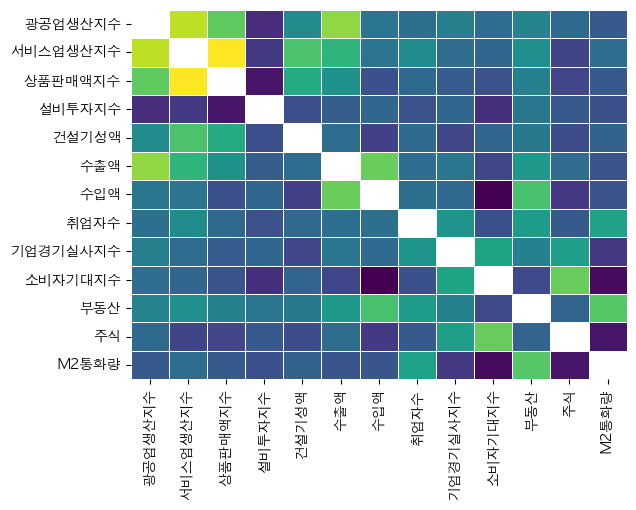

In [119]:
sns.heatmap(pairwise_df*-1, cmap='viridis', fmt='.2f', linewidths=0.5, cbar=False)

In [35]:
# 얼마나 같은 4분면에 있는지 확인

In [37]:
print(scaled_df_cycle1.values.shape)
print(scaled_df_cycle2.values.shape)

(64, 13)
(64, 13)


In [47]:
scaled_cycle_values = np.concatenate([scaled_df_cycle1.values.reshape(64, 13, -1), scaled_df_cycle2.values.reshape(64, 13, -1)], axis=2)

In [48]:
print(scaled_cycle_values.shape)

(64, 13, 2)


In [52]:
scaled_cycle_sign = np.sign(scaled_cycle_values)

In [72]:
def find_axis(x, y):
    if x > 0 and y > 0:
        return 1
    elif x < 0 and y > 0:
        return 2
    elif x < 0 and y < 0:
        return 3
    elif x > 0 and y < 0:   
        return 4
    else:
        return 0

In [73]:
new_arr = np.zeros((64, 13))
for i in range(64):
    for j in range(13):
        new_arr[i, j] = find_axis(scaled_cycle_sign[i, j, 0], scaled_cycle_sign[i, j, 1])

In [90]:
pd.Series(new_arr.flatten()).value_counts()

1.0    441
3.0    236
2.0     78
4.0     49
0.0     28
Name: count, dtype: int64

In [91]:
new_arr2 = np.zeros((13, 13))
for i in range(13):
    for j in range(13):
        new_arr2[i, j] = len([i for i in (new_arr[:, i] - new_arr[:, j]) if i == 0])

In [108]:
np.fill_diagonal(new_arr2, None)

In [109]:
pairwise_df2 = pd.DataFrame(new_arr2/64*100, index=new_columns, columns=new_columns)

<Axes: >

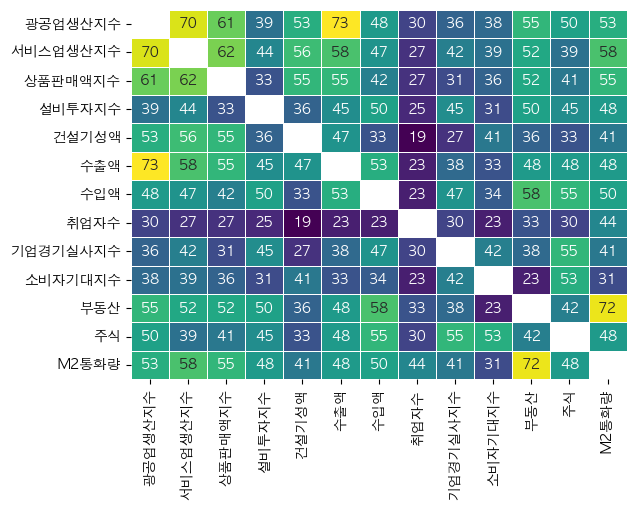

In [110]:
sns.heatmap(pairwise_df2, cmap='viridis', linewidths=0.5, cbar=False, annot=True)

In [70]:
# 위 scaled_cycle_sign을 이용하여 각 4분면에 몇개의 dataset이 있는지 확인
unique, counts = np.unique(scaled_cycle_sign, return_counts=True, axis=0)

In [121]:
scaled_df_cycle

,전산업생산지수(농림어업제외) 광공업 2020=100 M전기대비 증감,전산업생산지수(농림어업제외) 서비스업 2020=100 M전기대비 증감,재별 및 상품군별 판매액지수 총지수 nan M전기대비 증감,설비투자지수 계절조정지수 2020=100 M전기대비 증감,건설기성액 총기성액 백만원 M전기대비 증감,국가별 수출 국별수출(관세청) 천달러 M전기대비 증감,국가별 수입 국별수입(관세청) 천달러 M전기대비 증감,국제 주요국 취업자수(계절변동조정) 한국 천명 Q전기대비 증감,기업경기조사(실적) 전 산 업 nan M전기대비 증감,9~) 향후경기전망CSI nan M전기대비 증감,...,설비투자지수 계절조정지수 2020=100 M추세(1년)대비 위치,건설기성액 총기성액 백만원 M추세(1년)대비 위치,국가별 수출 국별수출(관세청) 천달러 M추세(1년)대비 위치,국가별 수입 국별수입(관세청) 천달러 M추세(1년)대비 위치,국제 주요국 취업자수(계절변동조정) 한국 천명 Q추세(1년)대비 위치,기업경기조사(실적) 전 산 업 nan M추세(1년)대비 위치,9~) 향후경기전망CSI nan M추세(1년)대비 위치,주택매매가격지수(KB) 총지수 2022.01=100 M추세(1년)대비 위치,주식시장(일) KOSPI지수 1980.01.04=100 D추세(1년)대비 위치,"M2 경제주체별 보유현황(말잔, 원계열) M2(말잔, 원계열) 십억원 M추세(1년)대비 위치"
TIME,,,,,,,,,,,,,,,,,,,,,
2009-06-30,1.000000,0.461993,0.733883,0.466061,0.298931,0.810150,0.154706,0.156759,1.000000,1.000000,...,-0.310226,0.063512,-0.165295,-0.966594,0.019426,0.730773,0.871166,-0.144957,0.136309,0.348983
2009-09-30,0.378858,0.014600,-0.060364,0.298889,-0.111051,0.224890,0.703296,0.000000,0.162444,0.448491,...,0.378755,-0.075960,0.424348,0.234024,0.031577,0.904888,1.000000,0.038253,0.441771,0.308682
2009-12-31,0.477080,0.418927,1.000000,0.540774,0.579660,0.472607,0.524230,0.000000,0.334238,-0.051469,...,0.921749,0.519089,0.848334,0.653549,0.043729,1.000000,0.507552,0.166171,0.331819,0.322318
2010-03-31,0.027277,-0.282173,-0.770402,0.511255,-0.327483,-0.132757,0.351094,0.490038,-0.015067,-0.343047,...,1.000000,-0.155170,0.233181,0.584951,0.410098,0.341665,-0.066523,0.157386,0.162988,0.336362
2010-06-30,0.584065,0.281529,0.492764,0.159514,0.129817,0.969263,0.472118,0.377872,0.233713,-0.183058,...,0.700647,-0.026210,0.979259,0.551113,0.589629,0.434612,-0.325917,0.121237,0.100930,0.337565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,-0.190559,-0.565688,-0.532972,-0.431761,-0.488439,-0.216656,-0.188199,0.207025,-0.328189,0.056650,...,-0.162561,-0.183851,0.153817,-0.038792,0.173253,-0.286123,0.077577,-0.082091,0.112231,0.622275
2024-06-30,0.035910,0.064933,0.365848,-0.010055,-0.393696,0.409079,0.112743,-0.026179,0.467605,-0.051436,...,-0.131936,-0.652065,0.418300,0.089090,0.096188,0.402310,0.000805,-0.072456,0.199101,0.560307
2024-09-30,-0.254781,-0.182637,-1.000000,1.000000,0.731847,0.106651,0.193547,0.000000,-0.427672,0.047395,...,0.887329,0.030283,0.285754,0.124130,0.044875,-0.157543,0.040711,-0.029685,0.111711,0.529112
